---
> # **신용등급예측 비재무 머신러닝 구축 프로젝트**
> - ## **기업정보상세**
> - ## **상표권정보**
> - ## **디자인권정보**
> - ## **실용신안정보**
> - ## **취업리뷰포탈**
> - ## **특허정보상세**
> - ## **특허정보요약**

---

---
> # **라이브러리 호출**
---

!pip install numpy
!pip install pandas
!pip install seaborn
!pip install matplotlib
!pip install plotly
!pip install scipy
!pip install scikit-learn

In [1]:
import numpy as np
import pandas as pd # 정형데이터 전처리 / 통계 연산 수행
from datetime import timedelta # 시간데이터 처리

import seaborn as sns # 통계적 시각화 연산
import matplotlib as mpl # 시각화 옵션 (외부)
import matplotlib.pyplot as plt # 시각화 옵션 (내부)
import plotly.express as px # 동적 그래프 시각화
import scipy.stats as stats # 통계적 가설 검정 수행

from sklearn.model_selection import train_test_split # 머신러닝 데이터 split
from sklearn.tree import DecisionTreeClassifier # 분류모델
from sklearn.metrics import accuracy_score # 머신러닝 평가
from sklearn.metrics import classification_report # 분류모델의 성능 측정함수

mpl.rc('font',family='Malgun Gothic') # 한글 글꼴 설정
plt.rcParams['axes.unicode_minus'] = False # 음수 오류 해결

---
> # **기업정보 데이터**
> ### - 기업정보상세
---

### **자산총계 결측치인 사업자등록번호 데이터 불러오기**

In [2]:
jasan_null = pd.read_csv("자산총계null.csv",encoding='CP949',index_col=0)
jasan_null

,사업자등록번호,종업원수,종업원그룹,성장단계,산업대분류,기업규모,기업형태,CRI등급
0,1050508965,93.868687,1,창업형,96,중소기업,폐업,D
14,1050707660,0.000000,10,창업형,68,중소기업,일반,C2
15,1050905695,16.198142,4,창업형,15,중소기업,일반,C2
16,7912209314,13.968341,4,창업형,47,중소기업,일반,C3
17,1101904548,16.198142,4,창업형,47,중소기업,일반,C2
...,...,...,...,...,...,...,...,...
9869,2148708573,150.000000,1,창업형,58,중소기업,외감,A3
9870,4208704866,7.000000,7,창업형,41,중소기업,일반,A3
9871,4618107952,3.000000,9,창업형,41,중소기업,일반,C2
9872,2208107776,21.000000,3,창업형,63,중소기업,외감,C2


In [3]:
jasan_all = pd.read_csv("자산총계결측치.csv",encoding='CP949',index_col=0)
jasan_all

,사업자등록번호,종업원수,종업원그룹,성장단계,산업대분류,기업규모,기업형태,CRI등급,자산총계그룹화
0,1050508965,93.868687,1,창업형,96,중소기업,폐업,D,1
1,1010204456,5.000000,8,정체형,46,중소기업,일반,B3,8
2,1048107174,12.000000,5,자립성장형,50,중소기업,일반,B2,3
3,1018102731,18.000000,3,자립성장형,73,중소기업,일반,C2,6
4,1018606595,3.000000,9,정체형,68,중소기업,외감,C3,1
...,...,...,...,...,...,...,...,...,...
9832,2148708573,150.000000,1,창업형,58,중소기업,외감,A3,1
9833,4208704866,7.000000,7,창업형,41,중소기업,일반,A3,5
9834,4618107952,3.000000,9,창업형,41,중소기업,일반,C2,4
9835,2208107776,21.000000,3,창업형,63,중소기업,외감,C2,2


---
> # **비재무 데이터**
> ### - 실용신안정보
> ### - 상표권정보
> ### - 디자인권정보
> ### - 특허정보요약
> ### - 국가R&D과제
> ### - 취업리뷰포탈
---

- ### **실용신안정보,상표권정보,디자인권정보,특허정보요약 읽기**

In [4]:
Utility_Model = pd.read_csv('실용신안정보.csv',index_col = 0)
Trademark_Information_d = pd.read_csv('상표권정보.csv',index_col = 0)
Design_Information = pd.read_csv('디자인권정보.csv',index_col = 0)
Patent_Information = pd.read_csv('특허정보요약.csv')

C:\Users\DMCCONET\AppData\Local\Temp\ipykernel_19180\1558921073.py:3: DtypeWarning: Columns (15,20) have mixed types. Specify dtype option on import or set low_memory=False.
  Design_Information = pd.read_csv('디자인권정보.csv',index_col = 0)


In [5]:
cond1 = Utility_Model['등록상태'] == '등록'
Utility_Model.loc[cond1,'등록상태'] = 1
Utility_Model.loc[~cond1,'등록상태'] = 0
Utility_Model['등록상태'].value_counts()

0    21108
1      912
Name: 등록상태, dtype: int64

In [6]:
cond1 = Trademark_Information_d['출원상태'] == '등록'
Trademark_Information_d.loc[cond1,'출원상태'] = 1
Trademark_Information_d.loc[~cond1,'출원상태'] = 0
Trademark_Information_d['출원상태'].value_counts()

0    18597
1    12441
Name: 출원상태, dtype: int64

In [7]:
cond1 = Design_Information['출원상태'] == '등록'
Design_Information.loc[cond1,'출원상태'] = 1
Design_Information.loc[~cond1,'출원상태'] = 0
Design_Information['출원상태'].value_counts()

0    22325
1    12827
Name: 출원상태, dtype: int64

- ### **각각의 데이터에서 사업자등록번호별 개수를 세준다**

In [8]:
Utility_CI = pd.merge(jasan_null, Utility_Model, how='left', on='사업자등록번호')
Trademark_CI = pd.merge(jasan_null, Trademark_Information_d, how='left', on='사업자등록번호')
Design_CI = pd.merge(jasan_null, Design_Information, how='left', on='사업자등록번호')
Patent_CI = pd.merge(jasan_null, Patent_Information, how='left', on='사업자등록번호')

In [9]:
U_p = Utility_CI.pivot_table(index ='사업자등록번호', values = '등록상태', 
                               aggfunc= 'sum').sort_values(by = '등록상태', ascending= False).reset_index(col_level=0,col_fill='')
U_p = U_p.rename(columns = {'등록상태' : '실용신안'})
U_p

,사업자등록번호,실용신안
0,6211805277,46
1,8051704942,46
2,1282200024,21
3,1168100263,18
4,1130100121,15
...,...,...
1646,2128104015,0
1647,2128103240,0
1648,2128100767,0
1649,2122500571,0


In [10]:
T_p = Trademark_CI.pivot_table(index ='사업자등록번호', values = '출원상태', 
                               aggfunc= 'sum').sort_values(by = '출원상태', ascending= False).reset_index(col_level=0,col_fill='')

T_p = T_p.rename(columns = {'출원상태' : '상표권'})
T_p

,사업자등록번호,상표권
0,5338106089,9
1,8618705154,9
2,1148107034,9
3,3408606937,9
4,5468700775,9
...,...,...
1646,2648708856,0
1647,2668108203,0
1648,2718804999,0
1649,2718805919,0


In [11]:
D_p = Design_CI.pivot_table(index ='사업자등록번호', values = '출원상태', 
                               aggfunc= 'sum').sort_values(by = '출원상태', ascending= False).reset_index(col_level=0,col_fill='')
D_p = D_p.rename(columns = {'출원상태' : '디자인권'})
D_p

,사업자등록번호,디자인권
0,1045007696,99
1,1168100027,97
2,1050801982,94
3,1131201292,94
4,1070200792,84
...,...,...
1646,2248107700,0
1647,2248106983,0
1648,2248106714,0
1649,2248106455,0


In [12]:
P_p = Patent_CI.pivot_table(index ='사업자등록번호', values = '특허명', 
                               aggfunc= 'count').sort_values(by = '특허명', ascending= False).reset_index(col_level=0,col_fill='')
P_p = P_p.rename(columns = {'특허명' : '특허정보'})
P_p

,사업자등록번호,특허정보
0,1268101064,99
1,1268100179,99
2,1340400237,99
3,1130209493,99
4,1058200442,99
...,...,...
1646,4148103913,0
1647,4148107797,0
1648,5148103914,0
1649,2608600370,0


- ### **자산null인 사업자등록번호와 서로 합쳐준다**

In [13]:
UT_p = pd.merge(U_p, T_p, how='outer', on='사업자등록번호')
UTD_p = pd.merge(UT_p, D_p, how='outer', on='사업자등록번호')
UTDP_p = pd.merge(UTD_p, P_p, how='outer', on='사업자등록번호')
jasan_null_bi = pd.merge(jasan_null, UTDP_p, how='outer', on='사업자등록번호')
jasan_null_bi

,사업자등록번호,종업원수,종업원그룹,성장단계,산업대분류,기업규모,기업형태,CRI등급,실용신안,상표권,디자인권,특허정보
0,1050508965,93.868687,1,창업형,96,중소기업,폐업,D,1,7,82,7
1,1050707660,0.000000,10,창업형,68,중소기업,일반,C2,1,0,1,74
2,1050905695,16.198142,4,창업형,15,중소기업,일반,C2,0,0,0,99
3,7912209314,13.968341,4,창업형,47,중소기업,일반,C3,0,5,0,4
4,1101904548,16.198142,4,창업형,47,중소기업,일반,C2,0,1,1,17
...,...,...,...,...,...,...,...,...,...,...,...,...
1646,2148708573,150.000000,1,창업형,58,중소기업,외감,A3,0,8,0,1
1647,4208704866,7.000000,7,창업형,41,중소기업,일반,A3,0,3,0,0
1648,4618107952,3.000000,9,창업형,41,중소기업,일반,C2,0,0,0,0
1649,2208107776,21.000000,3,창업형,63,중소기업,외감,C2,0,9,0,2


In [14]:
Utility_CI_a = pd.merge(jasan_all, Utility_Model, how='left', on='사업자등록번호')
Trademark_CI_a = pd.merge(jasan_all, Trademark_Information_d, how='left', on='사업자등록번호')
Design_CI_a = pd.merge(jasan_all, Design_Information, how='left', on='사업자등록번호')
Patent_CI_a = pd.merge(jasan_all, Patent_Information, how='left', on='사업자등록번호')
U_p_a = Utility_CI_a.pivot_table(index ='사업자등록번호', values = '등록상태', 
                               aggfunc= 'sum').sort_values(by = '등록상태', ascending= False).reset_index(col_level=0,col_fill='')
U_p_a = U_p_a.rename(columns = {'등록상태' : '실용신안'})
T_p_a = Trademark_CI_a.pivot_table(index ='사업자등록번호', values = '출원상태', 
                               aggfunc= 'sum').sort_values(by = '출원상태', ascending= False).reset_index(col_level=0,col_fill='')

T_p_a = T_p_a.rename(columns = {'출원상태' : '상표권'})
D_p_a = Design_CI_a.pivot_table(index ='사업자등록번호', values = '출원상태', 
                               aggfunc= 'sum').sort_values(by = '출원상태', ascending= False).reset_index(col_level=0,col_fill='')
D_p_a = D_p_a.rename(columns = {'출원상태' : '디자인권'})
P_p_a = Patent_CI_a.pivot_table(index ='사업자등록번호', values = '특허명', 
                               aggfunc= 'count').sort_values(by = '특허명', ascending= False).reset_index(col_level=0,col_fill='')
P_p_a = P_p_a.rename(columns = {'특허명' : '특허정보'})

In [15]:
UT_p_a = pd.merge(U_p_a, T_p_a, how='outer', on='사업자등록번호')
UTD_p_a = pd.merge(UT_p_a, D_p_a, how='outer', on='사업자등록번호')
UTDP_p_a = pd.merge(UTD_p_a, P_p_a, how='outer', on='사업자등록번호')
jasan_all_bi = pd.merge(jasan_all, UTDP_p_a, how='outer', on='사업자등록번호')
jasan_all_bi

,사업자등록번호,종업원수,종업원그룹,성장단계,산업대분류,기업규모,기업형태,CRI등급,자산총계그룹화,실용신안,상표권,디자인권,특허정보
0,1050508965,93.868687,1,창업형,96,중소기업,폐업,D,1,1,7,82,7
1,1010204456,5.000000,8,정체형,46,중소기업,일반,B3,8,0,0,0,0
2,1048107174,12.000000,5,자립성장형,50,중소기업,일반,B2,3,0,0,0,0
3,1018102731,18.000000,3,자립성장형,73,중소기업,일반,C2,6,0,3,0,0
4,1018606595,3.000000,9,정체형,68,중소기업,외감,C3,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9832,2148708573,150.000000,1,창업형,58,중소기업,외감,A3,1,0,8,0,1
9833,4208704866,7.000000,7,창업형,41,중소기업,일반,A3,5,0,3,0,0
9834,4618107952,3.000000,9,창업형,41,중소기업,일반,C2,4,0,0,0,0
9835,2208107776,21.000000,3,창업형,63,중소기업,외감,C2,2,0,9,0,2


- ### **취업포탈리뷰 불러오기**

In [16]:
Review = pd.read_csv('취업포탈리뷰.csv',index_col = 0)
Review = Review[['사업자등록번호', '종합점수',
       '승진기회점수', '복지및급여점수', '업무생명균형점수', '기업문화점수', '경영진점수']]
Review

,사업자등록번호,종합점수,승진기회점수,복지및급여점수,업무생명균형점수,기업문화점수,경영진점수
0,2078102181,NaN,NaN,NaN,NaN,NaN,NaN
1,3128106841,NaN,NaN,NaN,NaN,NaN,NaN
2,1048100971,60.0,60.0,40.0,40.0,60.0,60.0
3,1048100971,80.0,60.0,40.0,80.0,80.0,40.0
4,1048100971,60.0,100.0,60.0,100.0,40.0,40.0
...,...,...,...,...,...,...,...
34442,7068605150,NaN,NaN,NaN,NaN,NaN,NaN
34443,7068608305,NaN,NaN,NaN,NaN,NaN,NaN
34444,7078103270,NaN,NaN,NaN,NaN,NaN,NaN
34445,7078800286,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
R_p = Review.pivot_table(index='사업자등록번호',values=['종합점수','승진기회점수','복지및급여점수','업무생명균형점수','기업문화점수','경영진점수'],aggfunc='mean').reset_index()
R_p

,사업자등록번호,경영진점수,기업문화점수,복지및급여점수,승진기회점수,업무생명균형점수,종합점수
0,1011106242,100.000000,100.000000,80.000000,80.000000,100.000000,80.000000
1,1018100030,20.000000,26.666667,37.777778,35.555556,40.000000,20.000000
2,1018100096,40.000000,57.777778,40.000000,48.888889,68.888889,51.111111
3,1018100111,33.333333,35.555556,48.888889,44.444444,53.333333,42.222222
4,1018100198,45.000000,55.000000,50.000000,45.000000,52.500000,45.000000
...,...,...,...,...,...,...,...
3217,8838800993,20.000000,20.000000,40.000000,20.000000,60.000000,20.000000
3218,8918100430,40.000000,42.222222,48.888889,55.555556,46.666667,51.111111
3219,8928604248,73.333333,53.333333,53.333333,60.000000,73.333333,66.666667
3220,8938103184,40.000000,46.666667,42.222222,46.666667,46.666667,44.444444


In [18]:
jasan_null_bi = pd.merge(jasan_null_bi, R_p, how='left', on='사업자등록번호')
jasan_null_bi

,사업자등록번호,종업원수,종업원그룹,성장단계,산업대분류,기업규모,기업형태,CRI등급,실용신안,상표권,디자인권,특허정보,경영진점수,기업문화점수,복지및급여점수,승진기회점수,업무생명균형점수,종합점수
0,1050508965,93.868687,1,창업형,96,중소기업,폐업,D,1,7,82,7,NaN,NaN,NaN,NaN,NaN,NaN
1,1050707660,0.000000,10,창업형,68,중소기업,일반,C2,1,0,1,74,NaN,NaN,NaN,NaN,NaN,NaN
2,1050905695,16.198142,4,창업형,15,중소기업,일반,C2,0,0,0,99,60.000000,66.666667,33.333333,40.000000,80.000000,53.333333
3,7912209314,13.968341,4,창업형,47,중소기업,일반,C3,0,5,0,4,NaN,NaN,NaN,NaN,NaN,NaN
4,1101904548,16.198142,4,창업형,47,중소기업,일반,C2,0,1,1,17,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1646,2148708573,150.000000,1,창업형,58,중소기업,외감,A3,0,8,0,1,51.111111,62.222222,44.444444,64.444444,62.222222,62.222222
1647,4208704866,7.000000,7,창업형,41,중소기업,일반,A3,0,3,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1648,4618107952,3.000000,9,창업형,41,중소기업,일반,C2,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1649,2208107776,21.000000,3,창업형,63,중소기업,외감,C2,0,9,0,2,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
jasan_null_bi.isnull().sum()

사업자등록번호        0
종업원수           0
종업원그룹          0
성장단계           0
산업대분류          0
기업규모           0
기업형태           0
CRI등급          0
실용신안           0
상표권            0
디자인권           0
특허정보           0
경영진점수       1223
기업문화점수      1223
복지및급여점수     1223
승진기회점수      1223
업무생명균형점수    1223
종합점수        1223
dtype: int64

In [20]:
jasan_all_bi = pd.merge(jasan_all_bi, R_p, how='left', on='사업자등록번호')
jasan_all_bi

,사업자등록번호,종업원수,종업원그룹,성장단계,산업대분류,기업규모,기업형태,CRI등급,자산총계그룹화,실용신안,상표권,디자인권,특허정보,경영진점수,기업문화점수,복지및급여점수,승진기회점수,업무생명균형점수,종합점수
0,1050508965,93.868687,1,창업형,96,중소기업,폐업,D,1,1,7,82,7,NaN,NaN,NaN,NaN,NaN,NaN
1,1010204456,5.000000,8,정체형,46,중소기업,일반,B3,8,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,1048107174,12.000000,5,자립성장형,50,중소기업,일반,B2,3,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,1018102731,18.000000,3,자립성장형,73,중소기업,일반,C2,6,0,3,0,0,40.000000,66.666667,40.000000,64.444444,37.777778,51.111111
4,1018606595,3.000000,9,정체형,68,중소기업,외감,C3,1,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9832,2148708573,150.000000,1,창업형,58,중소기업,외감,A3,1,0,8,0,1,51.111111,62.222222,44.444444,64.444444,62.222222,62.222222
9833,4208704866,7.000000,7,창업형,41,중소기업,일반,A3,5,0,3,0,0,NaN,NaN,NaN,NaN,NaN,NaN
9834,4618107952,3.000000,9,창업형,41,중소기업,일반,C2,4,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
9835,2208107776,21.000000,3,창업형,63,중소기업,외감,C2,2,0,9,0,2,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
jasan_all_bi.isnull().sum()

사업자등록번호        0
종업원수           0
종업원그룹          0
성장단계           0
산업대분류          0
기업규모           0
기업형태           0
CRI등급          0
자산총계그룹화        0
실용신안           0
상표권            0
디자인권           0
특허정보           0
경영진점수       6636
기업문화점수      6636
복지및급여점수     6636
승진기회점수      6636
업무생명균형점수    6636
종합점수        6636
dtype: int64

- ### **jason_null_bi - 점수데이터 결측치 산업대분류로 처리**

In [22]:
stats.kruskal(jasan_null_bi.dropna(subset='경영진점수').loc[jasan_null_bi.CRI등급.isin(['A1','A2','A3'])].경영진점수,
jasan_null_bi.dropna(subset='경영진점수').loc[jasan_null_bi.CRI등급.isin(['B1','B2','B3'])].경영진점수,
jasan_null_bi.dropna(subset='경영진점수').loc[jasan_null_bi.CRI등급.isin(['C1','C2','C3'])].경영진점수,
jasan_null_bi.dropna(subset='경영진점수').loc[jasan_null_bi.CRI등급.isin(['D'])].경영진점수)

KruskalResult(statistic=3.9544991409695838, pvalue=0.2664195032530853)

In [23]:
print(jasan_null_bi.dropna(subset='경영진점수').loc[jasan_null_bi.CRI등급.isin(['A1','A2','A3'])].경영진점수.mean())
print(jasan_null_bi.dropna(subset='경영진점수').loc[jasan_null_bi.CRI등급.isin(['B1','B2','B3'])].경영진점수.mean())
print(jasan_null_bi.dropna(subset='경영진점수').loc[jasan_null_bi.CRI등급.isin(['C1','C2','C3'])].경영진점수.mean())
print(jasan_null_bi.dropna(subset='경영진점수').loc[jasan_null_bi.CRI등급.isin(['D'])].경영진점수.mean())

51.98290598290599
47.220440557175245
51.12199984663753
50.67901234567901


In [24]:
c = jasan_null_bi.dropna(subset='경영진점수').loc[jasan_null_bi.산업대분류.isin([71, 20, 61, 62, 15, 70, 22, 58, 41, 26, 42, 75, 63, 85, 94, 10, 47,
            59, 73, 28, 76, 46, 29, 56, 38, 60, 68, 27])]
stats.kruskal(c.loc[jasan_null_bi.산업대분류 == 71].경영진점수,
             c.loc[jasan_null_bi.산업대분류 == 20].경영진점수,
             c.loc[jasan_null_bi.산업대분류 == 61].경영진점수,
             c.loc[jasan_null_bi.산업대분류 == 62].경영진점수,
             c.loc[jasan_null_bi.산업대분류 == 15].경영진점수,
             c.loc[jasan_null_bi.산업대분류 == 70].경영진점수,
             c.loc[jasan_null_bi.산업대분류 == 22].경영진점수,
             c.loc[jasan_null_bi.산업대분류 == 58].경영진점수,
             c.loc[jasan_null_bi.산업대분류 == 41].경영진점수,
             c.loc[jasan_null_bi.산업대분류 == 26].경영진점수,
             c.loc[jasan_null_bi.산업대분류 == 42].경영진점수,
             c.loc[jasan_null_bi.산업대분류 == 75].경영진점수,
             c.loc[jasan_null_bi.산업대분류 == 63].경영진점수,
             c.loc[jasan_null_bi.산업대분류 == 85].경영진점수,
             c.loc[jasan_null_bi.산업대분류 == 94].경영진점수,
             c.loc[jasan_null_bi.산업대분류 == 10].경영진점수,
             c.loc[jasan_null_bi.산업대분류 == 47].경영진점수,
             c.loc[jasan_null_bi.산업대분류 == 59].경영진점수,
             c.loc[jasan_null_bi.산업대분류 == 73].경영진점수,
             c.loc[jasan_null_bi.산업대분류 == 28].경영진점수,
             c.loc[jasan_null_bi.산업대분류 == 76].경영진점수,
             c.loc[jasan_null_bi.산업대분류 == 46].경영진점수,
             c.loc[jasan_null_bi.산업대분류 == 29].경영진점수,
             c.loc[jasan_null_bi.산업대분류 == 56].경영진점수,
             c.loc[jasan_null_bi.산업대분류 == 38].경영진점수,
             c.loc[jasan_null_bi.산업대분류 == 60].경영진점수,
             c.loc[jasan_null_bi.산업대분류 == 68].경영진점수,
             c.loc[jasan_null_bi.산업대분류 == 27].경영진점수)

KruskalResult(statistic=45.10630510932709, pvalue=0.015845673875167457)

In [25]:
jasan_all_bi.dropna(subset='경영진점수').산업대분류.value_counts().index.tolist()[:6]

[58, 62, 42, 46, 26, 63]

In [26]:
a = jasan_all_bi.dropna(subset='경영진점수').산업대분류.value_counts().index.tolist()[:6]
c = jasan_all_bi.dropna(subset='경영진점수').loc[jasan_all_bi.산업대분류.isin(a)]
l = []
for i in range(len(a)):
    l.append(c.loc[jasan_all_bi.산업대분류 == a[i]].경영진점수)

print(len(l))
stats.kruskal(l[0],l[1],l[2],l[3],l[4],l[5])

6


KruskalResult(statistic=61.39128839320968, pvalue=6.267217170926958e-12)

In [27]:
jasan_null_bi.산업대분류

0       96
1       68
2       15
3       47
4       47
        ..
1646    58
1647    41
1648    41
1649    63
1650    41
Name: 산업대분류, Length: 1651, dtype: int64

In [28]:
jasan_null_bi.pivot_table(index='산업대분류', values='경영진점수',aggfunc=['mean','count'])

,mean,count
,경영진점수,경영진점수
산업대분류,,
10,43.492063,2
15,60.000000,1
20,74.285714,1
22,51.111111,1
26,49.494949,11
27,20.000000,1
28,38.888889,2
29,36.000000,1


In [29]:
jasan_all_bi.pivot_table(index='산업대분류', values='경영진점수',aggfunc=['mean','count'])

,mean,count
,경영진점수,경영진점수
산업대분류,,
10,42.184524,20
13,46.222222,5
14,36.000000,15
15,37.142857,3
16,31.111111,1
...,...,...
11,NaN,0
39,NaN,0


In [30]:
jasan_null_bi.isnull().sum()

사업자등록번호        0
종업원수           0
종업원그룹          0
성장단계           0
산업대분류          0
기업규모           0
기업형태           0
CRI등급          0
실용신안           0
상표권            0
디자인권           0
특허정보           0
경영진점수       1223
기업문화점수      1223
복지및급여점수     1223
승진기회점수      1223
업무생명균형점수    1223
종합점수        1223
dtype: int64

In [31]:
B = jasan_null_bi.dropna(subset='경영진점수').pivot_table(index='산업대분류',values="경영진점수",aggfunc='mean').sort_values(by='경영진점수',ascending=False).index.tolist()
for i in range(len(B)):
    jasan_null_bi.loc[(jasan_null_bi.경영진점수.isnull()) & (jasan_null_bi.산업대분류 == B[i]),'경영진점수'] = jasan_null_bi[jasan_null_bi.산업대분류 == B[i]].경영진점수.mean()
    jasan_null_bi.loc[(jasan_null_bi.기업문화점수.isnull()) & (jasan_null_bi.산업대분류 == B[i]),'기업문화점수'] = jasan_null_bi[jasan_null_bi.산업대분류 == B[i]].기업문화점수.mean()
    jasan_null_bi.loc[(jasan_null_bi.복지및급여점수.isnull()) & (jasan_null_bi.산업대분류 == B[i]),'복지및급여점수'] = jasan_null_bi[jasan_null_bi.산업대분류 == B[i]].복지및급여점수.mean()
    jasan_null_bi.loc[(jasan_null_bi.승진기회점수.isnull()) & (jasan_null_bi.산업대분류 == B[i]),'승진기회점수'] = jasan_null_bi[jasan_null_bi.산업대분류 == B[i]].승진기회점수.mean()
    jasan_null_bi.loc[(jasan_null_bi.업무생명균형점수.isnull()) & (jasan_null_bi.산업대분류 == B[i]),'업무생명균형점수'] = jasan_null_bi[jasan_null_bi.산업대분류 == B[i]].업무생명균형점수.mean()
    jasan_null_bi.loc[(jasan_null_bi.종합점수.isnull()) & (jasan_null_bi.산업대분류 == B[i]),'종합점수'] = jasan_null_bi[jasan_null_bi.산업대분류 == B[i]].종합점수.mean()

jasan_null_bi.isnull().sum()

사업자등록번호      0
종업원수         0
종업원그룹        0
성장단계         0
산업대분류        0
기업규모         0
기업형태         0
CRI등급        0
실용신안         0
상표권          0
디자인권         0
특허정보         0
경영진점수       38
기업문화점수      38
복지및급여점수     38
승진기회점수      38
업무생명균형점수    38
종합점수        38
dtype: int64

In [32]:
B = jasan_all_bi.dropna(subset='경영진점수').pivot_table(index='산업대분류',values="경영진점수",aggfunc='mean').sort_values(by='경영진점수',ascending=False).index.tolist()
for i in range(len(B)):
    jasan_all_bi.loc[(jasan_all_bi.경영진점수.isnull()) & (jasan_all_bi.산업대분류 == B[i]),'경영진점수'] = jasan_all_bi[jasan_all_bi.산업대분류 == B[i]].경영진점수.mean()
    jasan_all_bi.loc[(jasan_all_bi.기업문화점수.isnull()) & (jasan_all_bi.산업대분류 == B[i]),'기업문화점수'] = jasan_all_bi[jasan_all_bi.산업대분류 == B[i]].기업문화점수.mean()
    jasan_all_bi.loc[(jasan_all_bi.복지및급여점수.isnull()) & (jasan_all_bi.산업대분류 == B[i]),'복지및급여점수'] = jasan_all_bi[jasan_all_bi.산업대분류 == B[i]].복지및급여점수.mean()
    jasan_all_bi.loc[(jasan_all_bi.승진기회점수.isnull()) & (jasan_all_bi.산업대분류 == B[i]),'승진기회점수'] = jasan_all_bi[jasan_all_bi.산업대분류 == B[i]].승진기회점수.mean()
    jasan_all_bi.loc[(jasan_all_bi.업무생명균형점수.isnull()) & (jasan_all_bi.산업대분류 == B[i]),'업무생명균형점수'] = jasan_all_bi[jasan_all_bi.산업대분류 == B[i]].업무생명균형점수.mean()
    jasan_all_bi.loc[(jasan_all_bi.종합점수.isnull()) & (jasan_all_bi.산업대분류 == B[i]),'종합점수'] = jasan_all_bi[jasan_all_bi.산업대분류 == B[i]].종합점수.mean()

jasan_all_bi.isnull().sum()

사업자등록번호      0
종업원수         0
종업원그룹        0
성장단계         0
산업대분류        0
기업규모         0
기업형태         0
CRI등급        0
자산총계그룹화      0
실용신안         0
상표권          0
디자인권         0
특허정보         0
경영진점수       14
기업문화점수      14
복지및급여점수     14
승진기회점수      14
업무생명균형점수    14
종합점수        14
dtype: int64

In [33]:
jasan_null_bi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1651 entries, 0 to 1650
Data columns (total 18 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   사업자등록번호   1651 non-null   int64  
 1   종업원수      1651 non-null   float64
 2   종업원그룹     1651 non-null   int64  
 3   성장단계      1651 non-null   object 
 4   산업대분류     1651 non-null   int64  
 5   기업규모      1651 non-null   object 
 6   기업형태      1651 non-null   object 
 7   CRI등급     1651 non-null   object 
 8   실용신안      1651 non-null   int64  
 9   상표권       1651 non-null   int64  
 10  디자인권      1651 non-null   int64  
 11  특허정보      1651 non-null   int64  
 12  경영진점수     1613 non-null   float64
 13  기업문화점수    1613 non-null   float64
 14  복지및급여점수   1613 non-null   float64
 15  승진기회점수    1613 non-null   float64
 16  업무생명균형점수  1613 non-null   float64
 17  종합점수      1613 non-null   float64
dtypes: float64(7), int64(7), object(4)
memory usage: 309.6+ KB


- ### **jasan_all_bi - 점수데이터 결측치 산업대분류로 처리**

In [34]:
c = jasan_all_bi.dropna(subset='경영진점수').loc[jasan_all_bi.산업대분류.isin([71, 20, 61, 62, 15, 70, 22, 58, 41, 26, 42, 75, 63, 85, 94, 10, 47,
            59, 73, 28, 76, 46, 29, 56, 38, 60, 68, 27])]
stats.kruskal(c.loc[jasan_all_bi.산업대분류 == 71].경영진점수,
             c.loc[jasan_all_bi.산업대분류 == 20].경영진점수,
             c.loc[jasan_all_bi.산업대분류 == 61].경영진점수,
             c.loc[jasan_all_bi.산업대분류 == 62].경영진점수,
             c.loc[jasan_all_bi.산업대분류 == 15].경영진점수,
             c.loc[jasan_all_bi.산업대분류 == 70].경영진점수,
             c.loc[jasan_all_bi.산업대분류 == 22].경영진점수,
             c.loc[jasan_all_bi.산업대분류 == 58].경영진점수,
             c.loc[jasan_all_bi.산업대분류 == 41].경영진점수,
             c.loc[jasan_all_bi.산업대분류 == 26].경영진점수,
             c.loc[jasan_all_bi.산업대분류 == 42].경영진점수,
             c.loc[jasan_all_bi.산업대분류 == 75].경영진점수,
             c.loc[jasan_all_bi.산업대분류 == 63].경영진점수,
             c.loc[jasan_all_bi.산업대분류 == 85].경영진점수,
             c.loc[jasan_all_bi.산업대분류 == 94].경영진점수,
             c.loc[jasan_all_bi.산업대분류 == 10].경영진점수,
             c.loc[jasan_all_bi.산업대분류 == 47].경영진점수,
             c.loc[jasan_all_bi.산업대분류 == 59].경영진점수,
             c.loc[jasan_all_bi.산업대분류 == 73].경영진점수,
             c.loc[jasan_all_bi.산업대분류 == 28].경영진점수,
             c.loc[jasan_all_bi.산업대분류 == 76].경영진점수,
             c.loc[jasan_all_bi.산업대분류 == 46].경영진점수,
             c.loc[jasan_all_bi.산업대분류 == 29].경영진점수,
             c.loc[jasan_all_bi.산업대분류 == 56].경영진점수,
             c.loc[jasan_all_bi.산업대분류 == 38].경영진점수,
             c.loc[jasan_all_bi.산업대분류 == 60].경영진점수,
             c.loc[jasan_all_bi.산업대분류 == 68].경영진점수,
             c.loc[jasan_all_bi.산업대분류 == 27].경영진점수)

KruskalResult(statistic=2700.719136042069, pvalue=0.0)

In [35]:
B = jasan_all_bi.dropna(subset='경영진점수').pivot_table(index='산업대분류',values="경영진점수",aggfunc='mean').sort_values(by='경영진점수',ascending=False).index.tolist()
for i in range(len(B)):
    jasan_all_bi.loc[(jasan_all_bi.경영진점수.isnull()) & (jasan_all_bi.산업대분류 == B[i]),'경영진점수'] = jasan_all_bi[jasan_all_bi.산업대분류 == B[i]].경영진점수.mean()
    jasan_all_bi.loc[(jasan_all_bi.기업문화점수.isnull()) & (jasan_all_bi.산업대분류 == B[i]),'기업문화점수'] = jasan_all_bi[jasan_all_bi.산업대분류 == B[i]].기업문화점수.mean()
    jasan_all_bi.loc[(jasan_all_bi.복지및급여점수.isnull()) & (jasan_all_bi.산업대분류 == B[i]),'복지및급여점수'] = jasan_all_bi[jasan_all_bi.산업대분류 == B[i]].복지및급여점수.mean()
    jasan_all_bi.loc[(jasan_all_bi.승진기회점수.isnull()) & (jasan_all_bi.산업대분류 == B[i]),'승진기회점수'] = jasan_all_bi[jasan_all_bi.산업대분류 == B[i]].승진기회점수.mean()
    jasan_all_bi.loc[(jasan_all_bi.업무생명균형점수.isnull()) & (jasan_all_bi.산업대분류 == B[i]),'업무생명균형점수'] = jasan_all_bi[jasan_all_bi.산업대분류 == B[i]].업무생명균형점수.mean()
    jasan_all_bi.loc[(jasan_all_bi.종합점수.isnull()) & (jasan_all_bi.산업대분류 == B[i]),'종합점수'] = jasan_all_bi[jasan_all_bi.산업대분류 == B[i]].종합점수.mean()

jasan_all_bi.isnull().sum()

사업자등록번호      0
종업원수         0
종업원그룹        0
성장단계         0
산업대분류        0
기업규모         0
기업형태         0
CRI등급        0
자산총계그룹화      0
실용신안         0
상표권          0
디자인권         0
특허정보         0
경영진점수       14
기업문화점수      14
복지및급여점수     14
승진기회점수      14
업무생명균형점수    14
종합점수        14
dtype: int64

In [36]:
jasan_all_bi.to_csv("비재무요소.csv",encoding='CP949')

---
> # **비재무머신러닝 만들기**
---

In [37]:
!pip install imblearn


[notice] A new release of pip available: 22.3.1 -> 23.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [38]:
from sklearn.model_selection import train_test_split # 학습 검증 데이터 분할
from imblearn.pipeline import make_pipeline # 학습 + 특성공학 파이프라인 구축 
from sklearn.compose import make_column_transformer # 각 항목의 타입별로 파이프 분할

from sklearn.impute import SimpleImputer # 결측치 처리
from sklearn.preprocessing import MinMaxScaler # 숫자 스케일링
from sklearn.preprocessing import OneHotEncoder # 문자 데이터 인쾽
from imblearn.over_sampling import SMOTE # 불균형 데이터 처리

from sklearn.ensemble import RandomForestClassifier # 랜덤포레스트 (Bagging)
from sklearn.ensemble import GradientBoostingClassifier # 그레디언트 Boosting
from sklearn.tree import DecisionTreeClassifier # 의사결정모형
from sklearn.model_selection import GridSearchCV #교차검증 + 하이퍼 파라미터 튜닝
from sklearn.metrics import classification_report # 평가


from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer

In [39]:
jasan_null_bi.산업대분류 = jasan_null_bi.산업대분류.astype('object')
jasan_null_bi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1651 entries, 0 to 1650
Data columns (total 18 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   사업자등록번호   1651 non-null   int64  
 1   종업원수      1651 non-null   float64
 2   종업원그룹     1651 non-null   int64  
 3   성장단계      1651 non-null   object 
 4   산업대분류     1651 non-null   object 
 5   기업규모      1651 non-null   object 
 6   기업형태      1651 non-null   object 
 7   CRI등급     1651 non-null   object 
 8   실용신안      1651 non-null   int64  
 9   상표권       1651 non-null   int64  
 10  디자인권      1651 non-null   int64  
 11  특허정보      1651 non-null   int64  
 12  경영진점수     1613 non-null   float64
 13  기업문화점수    1613 non-null   float64
 14  복지및급여점수   1613 non-null   float64
 15  승진기회점수    1613 non-null   float64
 16  업무생명균형점수  1613 non-null   float64
 17  종합점수      1613 non-null   float64
dtypes: float64(7), int64(6), object(5)
memory usage: 309.6+ KB


In [40]:
jasan_null_bi.columns

Index(['사업자등록번호', '종업원수', '종업원그룹', '성장단계', '산업대분류', '기업규모', '기업형태', 'CRI등급',
       '실용신안', '상표권', '디자인권', '특허정보', '경영진점수', '기업문화점수', '복지및급여점수', '승진기회점수',
       '업무생명균형점수', '종합점수'],
      dtype='object')

In [41]:
jasan_null_bi.loc[jasan_null_bi.CRI등급 == 'A1','target'] = 0
jasan_null_bi.loc[jasan_null_bi.CRI등급 == 'A2','target'] = 1
jasan_null_bi.loc[jasan_null_bi.CRI등급 == 'A3','target'] = 2
jasan_null_bi.loc[jasan_null_bi.CRI등급 == 'B1','target'] = 3
jasan_null_bi.loc[jasan_null_bi.CRI등급 == 'B2','target'] = 4
jasan_null_bi.loc[jasan_null_bi.CRI등급 == 'B3','target'] = 5
jasan_null_bi.loc[jasan_null_bi.CRI등급 == 'C1','target'] = 6
jasan_null_bi.loc[jasan_null_bi.CRI등급 == 'C2','target'] = 7
jasan_null_bi.loc[jasan_null_bi.CRI등급 == 'C3','target'] = 8
jasan_null_bi.loc[jasan_null_bi.CRI등급 == 'D','target'] = 9

In [42]:
X = jasan_null_bi[['사업자등록번호','종업원그룹', '산업대분류', '성장단계', '기업규모', '기업형태', '실용신안', '상표권', '디자인권', '특허정보', '경영진점수',
       '기업문화점수', '복지및급여점수', '승진기회점수', '업무생명균형점수', '종합점수']]
Y = jasan_null_bi['target']

In [43]:
jasan_all_bi.loc[jasan_all_bi.CRI등급 == 'A1','target'] = 0
jasan_all_bi.loc[jasan_all_bi.CRI등급 == 'A2','target'] = 1
jasan_all_bi.loc[jasan_all_bi.CRI등급 == 'A3','target'] = 2
jasan_all_bi.loc[jasan_all_bi.CRI등급 == 'B1','target'] = 3
jasan_all_bi.loc[jasan_all_bi.CRI등급 == 'B2','target'] = 4
jasan_all_bi.loc[jasan_all_bi.CRI등급 == 'B3','target'] = 5
jasan_all_bi.loc[jasan_all_bi.CRI등급 == 'C1','target'] = 6
jasan_all_bi.loc[jasan_all_bi.CRI등급 == 'C2','target'] = 7
jasan_all_bi.loc[jasan_all_bi.CRI등급 == 'C3','target'] = 8
jasan_all_bi.loc[jasan_all_bi.CRI등급 == 'D','target'] = 9

In [44]:
jasan_all_bi.columns

Index(['사업자등록번호', '종업원수', '종업원그룹', '성장단계', '산업대분류', '기업규모', '기업형태', 'CRI등급',
       '자산총계그룹화', '실용신안', '상표권', '디자인권', '특허정보', '경영진점수', '기업문화점수', '복지및급여점수',
       '승진기회점수', '업무생명균형점수', '종합점수', 'target'],
      dtype='object')

In [45]:
X = jasan_all_bi[['사업자등록번호','종업원그룹', '산업대분류', '성장단계', '자산총계그룹화', '기업규모', '기업형태', '실용신안', '상표권', '디자인권', '특허정보', '경영진점수',
       '기업문화점수', '복지및급여점수', '승진기회점수', '업무생명균형점수', '종합점수']]
Y = jasan_all_bi['target']

C:\Users\DMCCONET\AppData\Local\Temp\ipykernel_19180\2439030204.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(X.corr())


<AxesSubplot: >

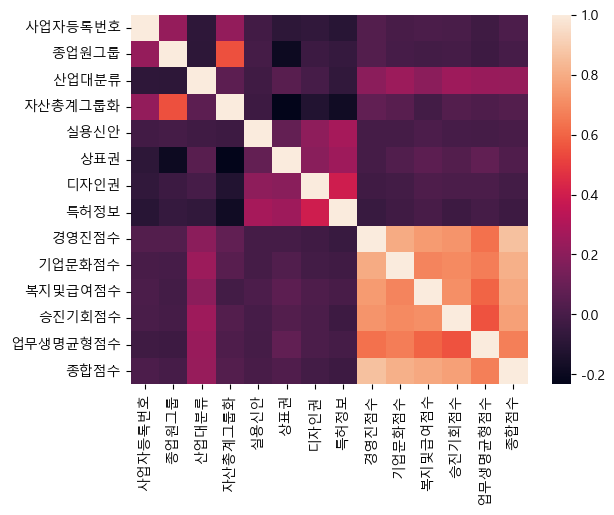

In [46]:
sns.heatmap(X.corr())

- ### **데이터 전처리**

In [47]:
def pipe_model_func(model):
    numeric_pipe = make_pipeline( SimpleImputer(strategy='mean'),MinMaxScaler())
    category_pipe = make_pipeline( SimpleImputer(strategy='most_frequent'), OneHotEncoder(handle_unknown='ignore'))
    numeric_list = X.describe().columns.tolist()
    category_list = X.describe(include='object').columns.tolist()
    preprocessing_pipe = make_column_transformer((numeric_pipe, numeric_list),
                                             (category_pipe, category_list))
    model_pipe=make_pipeline(preprocessing_pipe,SMOTE(),model)
    return model_pipe
numeric_list = X.describe().columns.tolist()

- ### **데이터 분할**

In [48]:
#X_train, X_test, Y_train, Y_test = train_test_split(X,Y, random_state=1234,test_size=0.3)

In [49]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, random_state=1234)

- ### **평가성능지표**

In [56]:
def evaluation_func(best_model):
    Y_train_pred = best_model.predict(X_train)
    Y_test_pred = best_model.predict(X_test)
    print('학습능력평가')
    print(classification_report(Y_train,Y_train_pred))
    print('일반화능력평가')
    print(classification_report(Y_test, Y_test_pred))

- ### **의사결정트리**

In [59]:
model_decision = pipe_model_func(DecisionTreeClassifier())
hyperparameter_dict = {'decisiontreeclassifier__max_depth':range(10,20),
                      'decisiontreeclassifier__min_samples_leaf' : [2,3,4,5,6]}
grid_model = GridSearchCV(model_decision,cv=5,param_grid = hyperparameter_dict,
                         scoring='accuracy',n_jobs=-1)
grid_model.fit(X_train,Y_train)
#grid_model.get_params().keys()
best_tree = grid_model.best_estimator_
evaluation_func(best_tree)

학습능력평가
              precision    recall  f1-score   support

         0.0       0.08      0.68      0.14       148
         1.0       0.32      0.30      0.31       359
         2.0       0.29      0.24      0.26       721
         3.0       0.26      0.22      0.24       878
         4.0       0.31      0.34      0.32      1315
         5.0       0.35      0.21      0.26      1193
         6.0       0.34      0.21      0.26       638
         7.0       0.51      0.48      0.49      1191
         8.0       0.46      0.33      0.39       832
         9.0       1.00      0.98      0.99       102

    accuracy                           0.32      7377
   macro avg       0.39      0.40      0.37      7377
weighted avg       0.36      0.32      0.33      7377

일반화능력평가
              precision    recall  f1-score   support

         0.0       0.07      0.51      0.12        55
         1.0       0.10      0.09      0.10       118
         2.0       0.17      0.15      0.16       265
         

- ### **랜덤포레스트**

In [58]:
model_random = pipe_model_func(RandomForestClassifier())
hyperparameter_dict = {'randomforestclassifier__max_depth' : range(10,20),
                      'randomforestclassifier__max_features': [2,3,4,5],
                     'randomforestclassifier__min_samples_split': [2,8,16]}
grid_model = GridSearchCV(model_random, param_grid = hyperparameter_dict,cv=3,
                          scoring='accuracy',n_jobs=-1)
grid_model.fit(X_train,Y_train)
best_randomforest = grid_model.best_estimator_
evaluation_func(best_randomforest)

학습능력평가
              precision    recall  f1-score   support

         0.0       0.32      0.78      0.46       148
         1.0       0.75      0.65      0.70       359
         2.0       0.78      0.57      0.66       721
         3.0       0.69      0.62      0.65       878
         4.0       0.57      0.71      0.64      1315
         5.0       0.60      0.62      0.61      1193
         6.0       0.81      0.57      0.67       638
         7.0       0.73      0.76      0.74      1191
         8.0       0.78      0.67      0.72       832
         9.0       1.00      0.99      1.00       102

    accuracy                           0.67      7377
   macro avg       0.70      0.70      0.68      7377
weighted avg       0.69      0.67      0.67      7377

일반화능력평가
              precision    recall  f1-score   support

         0.0       0.10      0.24      0.14        55
         1.0       0.10      0.13      0.11       118
         2.0       0.22      0.13      0.16       265
         

In [53]:
model_random = pipe_model_func(RandomForestClassifier())
hyperparameter_dict = {'randomforestclassifier__max_depth' : range(10,30),
                      'randomforestclassifier__max_features': [3,4,5,6],
                     'randomforestclassifier__min_samples_split': [2,4, 8,16]}
grid_model = GridSearchCV(model_random, param_grid = hyperparameter_dict,cv=3,
                          scoring='accuracy',n_jobs=-1)
grid_model.fit(X_train,Y_train)
best_randomforest = grid_model.best_estimator_
evaluation_func(best_randomforest)

학습능력평가
              precision    recall  f1-score   support

         0.0       0.34      0.78      0.47       148
         1.0       0.71      0.68      0.69       359
         2.0       0.80      0.58      0.67       721
         3.0       0.71      0.65      0.68       878
         4.0       0.59      0.74      0.65      1315
         5.0       0.64      0.64      0.64      1193
         6.0       0.80      0.60      0.68       638
         7.0       0.72      0.76      0.74      1191
         8.0       0.81      0.67      0.74       832
         9.0       1.00      0.99      1.00       102

    accuracy                           0.68      7377
   macro avg       0.71      0.71      0.70      7377
weighted avg       0.70      0.68      0.69      7377

일반화능력평가
              precision    recall  f1-score   support

         0.0       0.11      0.24      0.15        55
         1.0       0.15      0.15      0.15       118
         2.0       0.22      0.12      0.15       265
         

- ### **XG부스트**

In [54]:
!pip install xgboost


[notice] A new release of pip available: 22.3.1 -> 23.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [60]:
from xgboost import XGBClassifier
model_xg = pipe_model_func(XGBClassifier())
best_XG = model_xg.fit(X_train,Y_train)
evaluation_func(best_XG)

학습능력평가
              precision    recall  f1-score   support

         0.0       0.70      0.89      0.78       148
         1.0       0.85      0.76      0.80       359
         2.0       0.82      0.71      0.76       721
         3.0       0.82      0.72      0.77       878
         4.0       0.70      0.82      0.75      1315
         5.0       0.68      0.76      0.72      1193
         6.0       0.91      0.72      0.80       638
         7.0       0.83      0.86      0.85      1191
         8.0       0.85      0.76      0.81       832
         9.0       1.00      1.00      1.00       102

    accuracy                           0.78      7377
   macro avg       0.82      0.80      0.80      7377
weighted avg       0.79      0.78      0.78      7377

일반화능력평가
              precision    recall  f1-score   support

         0.0       0.13      0.15      0.14        55
         1.0       0.10      0.08      0.09       118
         2.0       0.21      0.16      0.18       265
         

- ### **GradientBoostingClassifier()**

In [ ]:
model_gb = pipe_model_func(GradientBoostingClassifier())
GB = model_gb.fit(X_train,Y_train)
evaluation_func(GB)

학습능력평가
              precision    recall  f1-score   support

         0.0       0.89      1.00      0.94         8
         1.0       0.64      0.88      0.74        32
         2.0       0.74      0.65      0.69        78
         3.0       0.64      0.70      0.67        97
         4.0       0.61      0.76      0.68       123
         5.0       0.55      0.57      0.56        63
         6.0       0.63      0.63      0.63       105
         7.0       0.83      0.79      0.81       421
         8.0       0.78      0.68      0.72       200
         9.0       1.00      1.00      1.00        28

    accuracy                           0.73      1155
   macro avg       0.73      0.77      0.74      1155
weighted avg       0.74      0.73      0.73      1155

일반화능력평가
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         2
         1.0       0.18      0.40      0.25        10
         2.0       0.24      0.28      0.26        36
         

In [ ]:
model_gb = pipe_model_func(GradientBoostingClassifier())
GB = model_gb.fit(X_a_train,Y_a_train)
evaluation_func(GB)

학습능력평가
              precision    recall  f1-score   support

         0.0       0.50      0.38      0.43         8
         1.0       0.45      0.28      0.35        32
         2.0       0.51      0.28      0.36        78
         3.0       0.37      0.25      0.30        97
         4.0       0.48      0.33      0.39       123
         5.0       0.25      0.16      0.19        63
         6.0       0.23      0.28      0.25       105
         7.0       0.61      0.73      0.67       421
         8.0       0.45      0.54      0.49       200
         9.0       1.00      1.00      1.00        28

    accuracy                           0.50      1155
   macro avg       0.49      0.42      0.44      1155
weighted avg       0.49      0.50      0.49      1155

일반화능력평가
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         2
         1.0       0.27      0.40      0.32        10
         2.0       0.37      0.28      0.32        36
         

c:\Users\DMCCONET\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\DMCCONET\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\DMCCONET\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf

In [ ]:
model_gb = pipe_model_func(GradientBoostingClassifier())
hyperparameter_dict = {'gradientboostingclassifier__max_depth':range(10,16),
                       'gradientboostingclassifier__min_samples_leaf' : [1,3,7,10],
                       'gradientboostingclassifier__min_samples_split' : [1,2,3,5,10],
                       'gradientboostingclassifier__learning_rate' : [0.05]}
grid_model = GridSearchCV(model_gb, param_grid = hyperparameter_dict,cv=5,
                          scoring='accuracy',n_jobs=-1, verbose=1)
grid_model.fit(X_train,Y_train)
best_GB = grid_model.best_estimator_
evaluation_func(best_GB)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


KeyboardInterrupt: 